In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

c:\Users\gunwo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df_train = pd.read_csv('./anomaly_detection_dataset_2022/trainset.csv')
df_train['created_at'] = pd.to_datetime(df_train['created_at']).dt.tz_localize(None) # convert to time + remove timezone
print(df_train.shape)

(45395, 19)


In [4]:
# turn it into a dataframe with single sensor value
# with the format required by Prophet
feature_name = df_train.columns.to_list()[2]
print(f'feature_name: {feature_name}')
df = df_train[['created_at', feature_name]]
df.columns = ['ds', 'y']
df.head()

feature_name: Air1_0013A20041A77E1F/humid


,ds,y
0,2022-06-20 11:25:00,45.0
1,2022-06-20 11:26:00,45.0
2,2022-06-20 11:27:00,45.0
3,2022-06-20 11:28:00,44.5
4,2022-06-20 11:29:00,44.0


In [5]:
m = Prophet()
m.fit(df)

13:22:40 - cmdstanpy - INFO - Chain [1] start processing
13:23:11 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=2)
past = df.drop(columns=['y'])
print(past.head())
fitted_values = m.predict(past)

future_values = m.predict(future)


                   ds
0 2022-06-20 11:25:00
1 2022-06-20 11:26:00
2 2022-06-20 11:27:00
3 2022-06-20 11:28:00
4 2022-06-20 11:29:00


In [7]:
fitted_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-20 11:25:00,41.699856,39.919531,48.091400,41.699856,41.699856,2.223586,2.223586,2.223586,1.598231,1.598231,1.598231,0.625355,0.625355,0.625355,0.0,0.0,0.0,43.923442
1,2022-06-20 11:26:00,41.701426,39.832980,47.777528,41.701426,41.701426,2.228858,2.228858,2.228858,1.601863,1.601863,1.601863,0.626996,0.626996,0.626996,0.0,0.0,0.0,43.930284
2,2022-06-20 11:27:00,41.702995,39.765640,47.963988,41.702995,41.702995,2.234019,2.234019,2.234019,1.605383,1.605383,1.605383,0.628636,0.628636,0.628636,0.0,0.0,0.0,43.937014
3,2022-06-20 11:28:00,41.704565,39.748660,47.879635,41.704565,41.704565,2.239068,2.239068,2.239068,1.608794,1.608794,1.608794,0.630274,0.630274,0.630274,0.0,0.0,0.0,43.943633
4,2022-06-20 11:29:00,41.706135,39.616812,47.699082,41.706135,41.706135,2.244006,2.244006,2.244006,1.612094,1.612094,1.612094,0.631911,0.631911,0.631911,0.0,0.0,0.0,43.950140


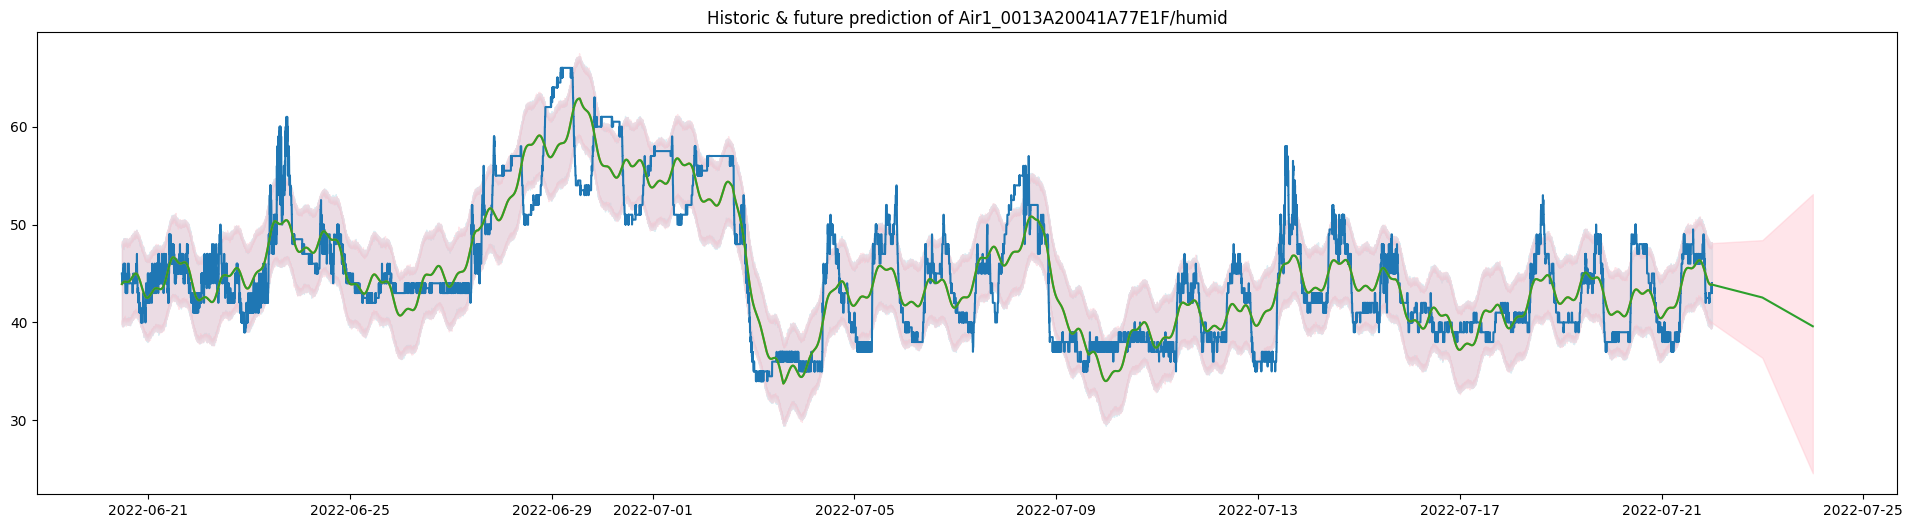

In [8]:
plt.figure(figsize=(24,6))
plt.plot(df['ds'], df['y'])
plt.plot(fitted_values['ds'], fitted_values['yhat'])
plt.fill_between(fitted_values['ds'], fitted_values['yhat_lower'], fitted_values['yhat_upper'], color='lightblue', alpha=0.4)


plt.plot(future_values['ds'], future_values['yhat'])
plt.fill_between(future_values['ds'], future_values['yhat_lower'], future_values['yhat_upper'], color='pink', alpha=0.4)


plt.title(f'Historic & future prediction of {feature_name}')
plt.plot()
plt.show()